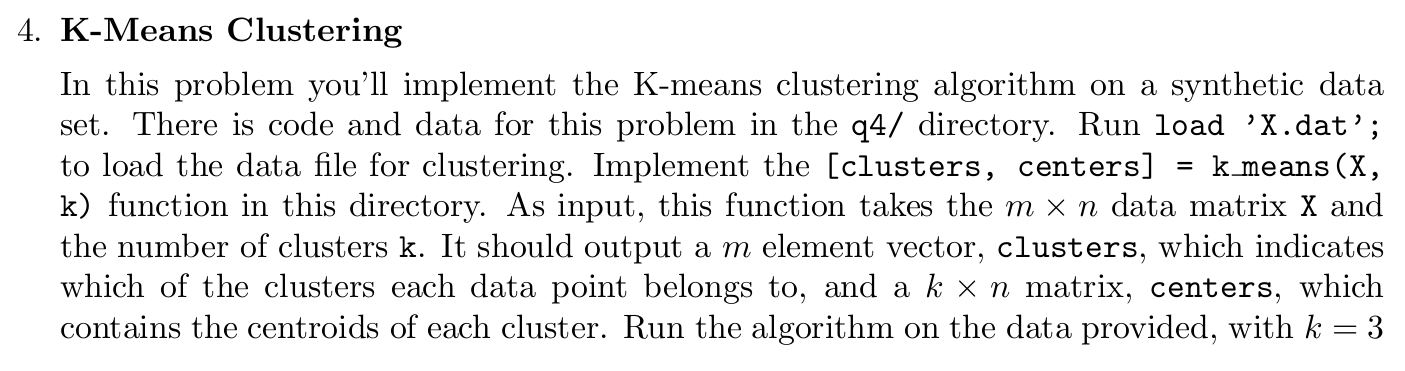

---
```
function [clusters, centroids] = k_means(X, k)

%%% YOUR CODE HERE
```
---

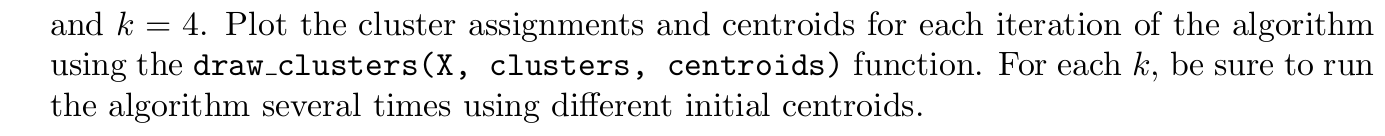

# Solution

In [3]:
import numpy as np

In [4]:
X = np.loadtxt('./data/PS3-data/q4/X.dat')
print(X.shape)

(5000, 2)


### Visualize the data

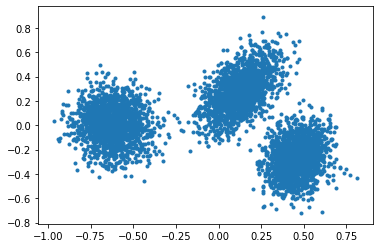

In [8]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], marker='.')
plt.show()

K-means algorithm:

> **Repeat**
>
> 1. **Initialize k centroids** at random
>
> 2. **Assign points** to closest centroids
>
> 3. **Update centroids** as **mean of each class**

In [53]:
def norm2(X, c):
    return np.sqrt(np.sum((X-c)**2, axis=1))

def distances(X, centroids):
    distances = np.asarray([norm2(X,c) for c in centroids])
    return distances



In [113]:
def k_means(X, k=3):
    m = X.shape[0] # m examples
    n = X.shape[1] # n dimensions
    
    
    # Initialize k centroids of n dimensions at random (from population)
    last_centroids = np.zeros((k, n))
    centroids = np.random.uniform(-1, 1, (k, n))
    i=0
    while np.sqrt(np.sum((last_centroids - centroids)**2)) > 1e-15 and 1e4:
        print("Epoch:", i)
        last_centroids = centroids.copy()
        # Assign points to closest centroids
        # closest: m x 1 dimensional
        #          with values {0,1,2,...,k}
        #          corresponding to closest centroid
        clusters = np.argmin(distances(X, centroids), axis=0)
        # Update centroids as mean of each class
        for c in range(k):
            #print(np.mean(X[clusters==c], axis=0))
            centroids[c,:] = np.mean(X[clusters==c], axis=0)
        i+=1
    
    return np.asarray([clusters, centroids])

clusters, centroids = k_means(X)

Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5


Let's plot those centroid coordinates

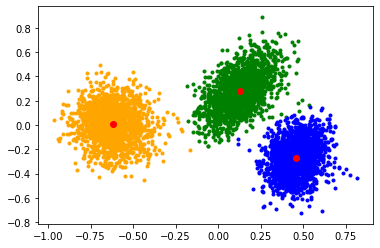

In [119]:
def plot_clusters(X, clusters, centroids):
    plt.scatter(X[clusters==0][:,0], X[clusters==0][:,1], marker='.', color='orange')
    plt.scatter(X[clusters==1][:,0], X[clusters==1][:,1], marker='.', color='g')
    plt.scatter(X[clusters==2][:,0], X[clusters==2][:,1], marker='.', color='b')
    plt.plot(centroids[:,0],centroids[:,1], 'bo', color='red')

    plt.show()
    
plot_clusters(X, clusters, centroids)

Epoch: 0


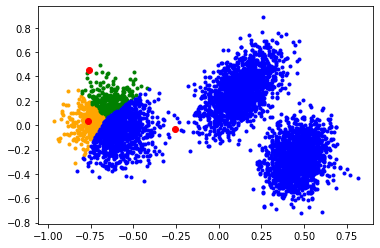

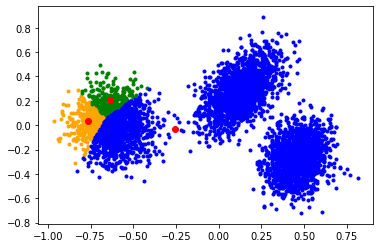

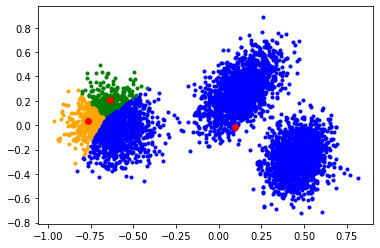

Epoch: 1


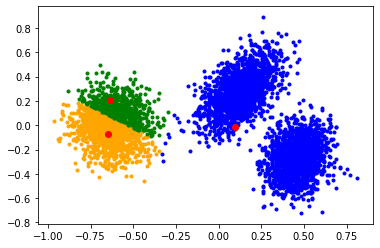

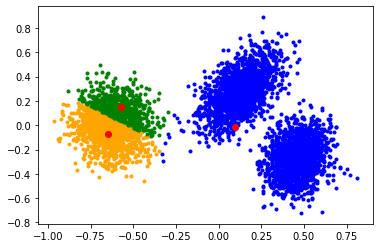

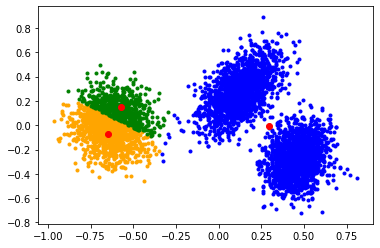

Epoch: 2


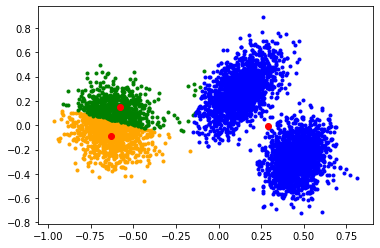

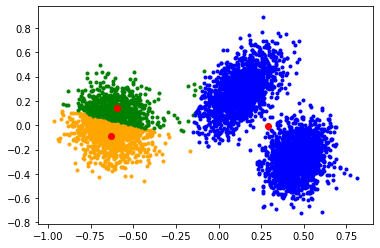

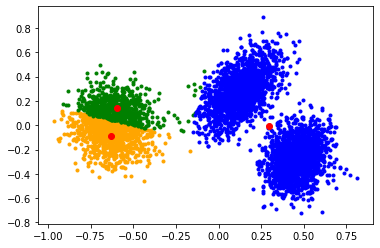

Epoch: 3


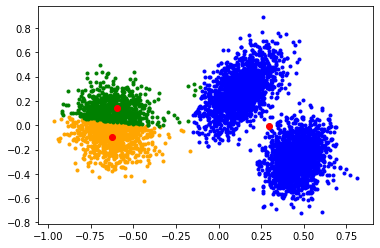

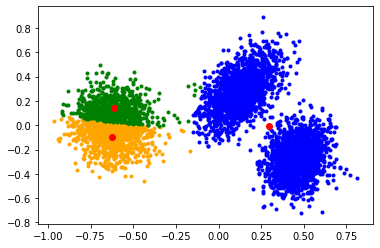

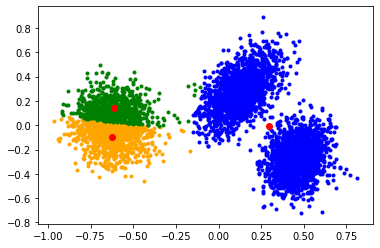

Epoch: 4


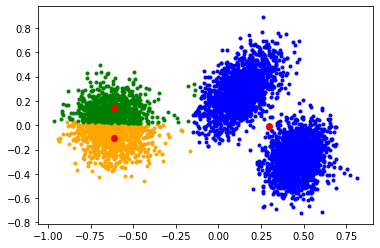

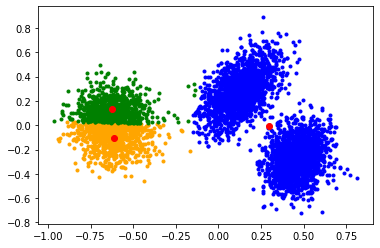

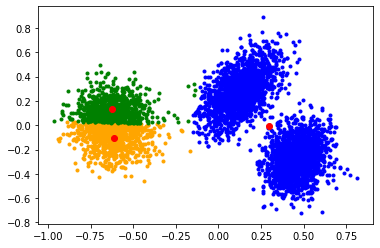

Epoch: 5


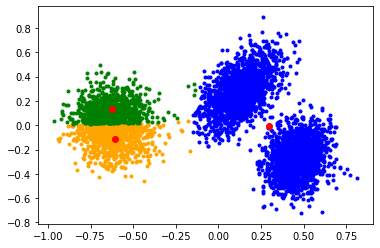

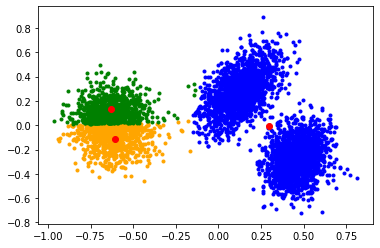

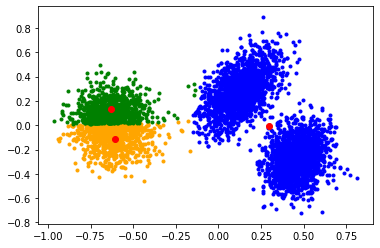

Epoch: 6


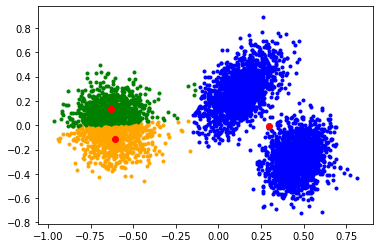

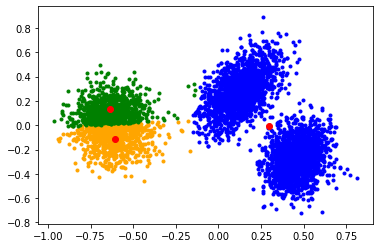

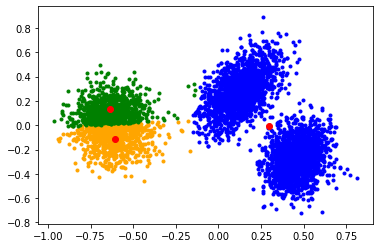

Epoch: 7


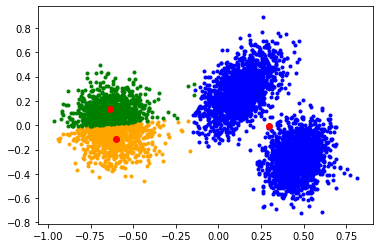

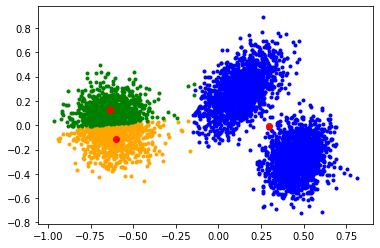

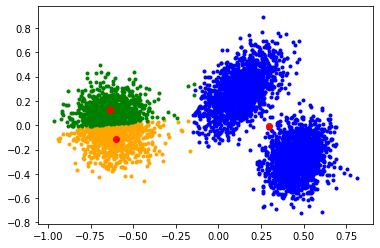

Epoch: 8


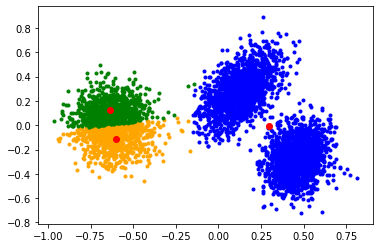

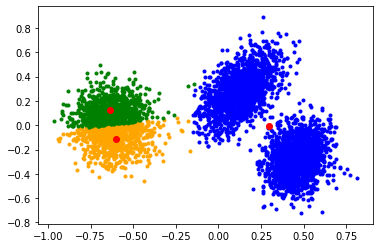

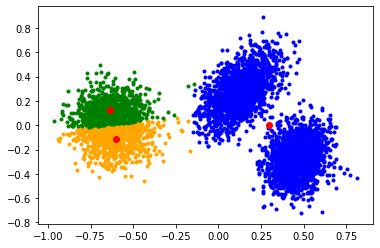

Epoch: 9


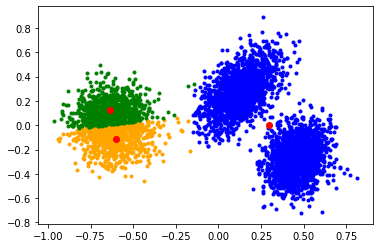

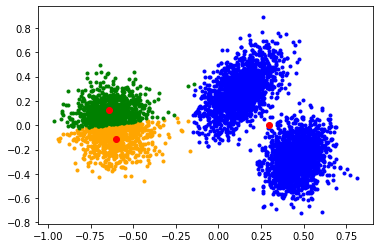

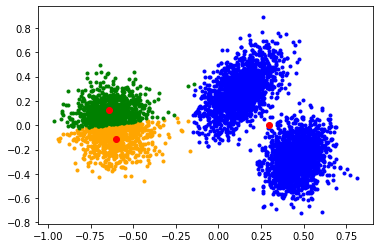

Epoch: 10


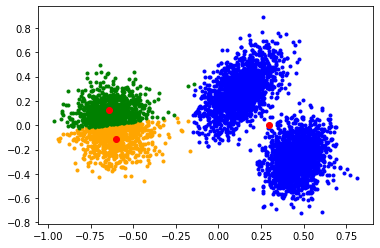

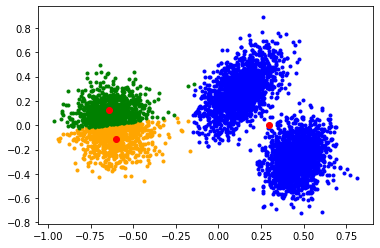

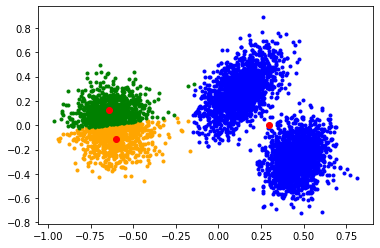

Epoch: 11


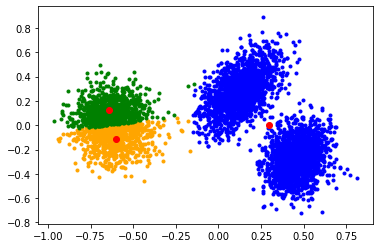

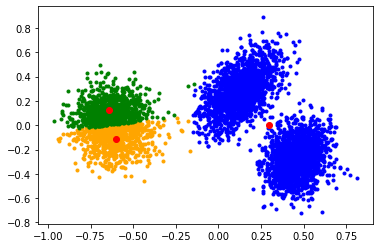

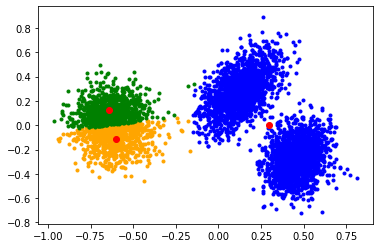

Epoch: 12


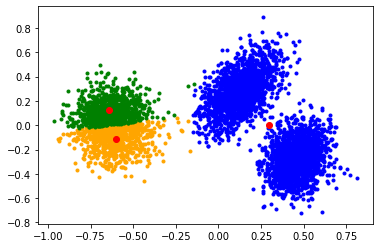

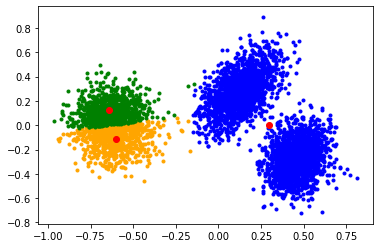

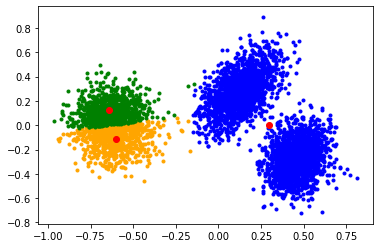

Epoch: 13


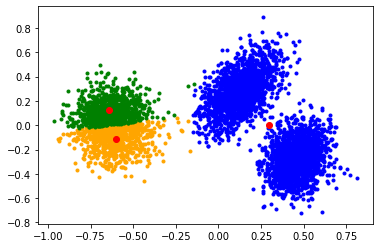

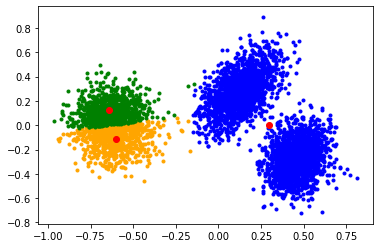

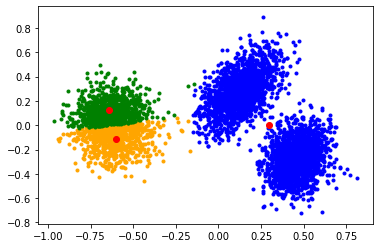

In [120]:
def k_means(X, k=3):
    m = X.shape[0] # m examples
    n = X.shape[1] # n dimensions
    
    
    # Initialize k centroids of n dimensions at random (from population)
    last_centroids = np.zeros((k, n))
    centroids = np.random.uniform(-1, 1, (k, n))
    i=0
    while np.sqrt(np.sum((last_centroids - centroids)**2)) > 1e-15 and 1e4:
        print("Epoch:", i)
        last_centroids = centroids.copy()
        # Assign points to closest centroids
        # closest: m x 1 dimensional
        #          with values {0,1,2,...,k}
        #          corresponding to closest centroid
        clusters = np.argmin(distances(X, centroids), axis=0)
        # Update centroids as mean of each class
        for c in range(k):
            #print(np.mean(X[clusters==c], axis=0))
            centroids[c,:] = np.mean(X[clusters==c], axis=0)
            plot_clusters(X, clusters, centroids)
        i+=1
    
    return np.asarray([clusters, centroids])

clusters, centroids = k_means(X)